##  2강.  DateTime Index, Time Resampling/Shifting, Rolling  
### <차례> 
> ### 1. Datetime index   
> ### 2. Time Resampling  
  시계열 데이터는 데이터 단위가 제각기일 수 있고, 중간중간 빠져있을 수 있다. 이런 경우 시간 단위를 조정해주어야하는데 이를 가르킴.   
> ### 3. Time shifting  
데이터 시간을 앞 또는 뒤로 미루는 것  
> ### 4. Rolling and Expanding  
데이터 수집하게 되면 노이즈가 포함되기도 하는데 이를 위해 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(or moving average)를 구함.  
판다스 내 rolling 함수를 이용하면 주어진 시한 내 평균 등을 구할 수 있음.  
임의의 시간간격의 윈도우를 만들고 그 안에서 mean등을 실행  


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
from datetime import datetime 

In [48]:
today = datetime(2019,1,24)
today

datetime.datetime(2019, 1, 24, 0, 0)

In [49]:
dates=[datetime(2019,1,24), datetime(2019,1,25)]

In [50]:
dt_index = pd.DatetimeIndex(dates)   #datetime -> index로 넘겨주기 
dt_index

DatetimeIndex(['2019-01-24', '2019-01-25'], dtype='datetime64[ns]', freq=None)

### 1. Time Resampling 

In [52]:
# Time resampling 

df=pd.read_csv('./data/apple_stock.csv')

In [53]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [54]:
df.info() 
#date = object type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


In [59]:
df['Date']=df['Date'].apply(pd.to_datetime) 
#date = datetime type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


In [62]:
df.set_index('Date', inplace=True)

#montly 합계를 구해보자 
df['month']=df.index.month

In [72]:
df.groupby('month').agg(sum)
#그러나 연도를 불문하고 모든 월의 합계가 들어가버림 

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [73]:
#연도별 합계 
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [74]:
#연도별, 월별 합계 
df.groupby([df.index.year, df.index.month]).agg(sum)

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
...                ...          ...          ...          ...           ...   
2018 8     4934.909988  4860.029999  4883.340012  4906.960037  7.002737e+08   
     9     4266.080002  4181.480011  4224.290009  4219.400024  6.789720e+08   
     10    5150.640030  5011.109985  5087.600021  5079.449997  7.897485e+08   
     11    4072.939987  3962.709976  4028.209991  4015.949997  9.613264e+08   
     12    3179.080017  3075.930023  3139.619995  3121.060028  8.989225e+08   

             Adj Close  month  
Date Date                      
2009 12      20.159719     12  
2010 1      377.554930     19  
     2      361.342400     38  
     3      491.575537     69  
     4      504.554579     84  
...                ...    ...  
2018 8     4884.851288    184  
     9     4204.729004    171  
     10    5061.788559    230  
     11    4012.316437    231  
     12    3121.060028    228  

[109 rows x 7 columns]

In [75]:
# 그룹바이는 멀티인덱스 하기에는 한계?복잡? 
# 그래서 resampling을 하는게 좋다 
# pandas docu의 offset timeseries 참고하기 rule='  ' <- 참고 
df.resample(rule='A')

In [77]:
df.resample(rule='A').sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010-12-31,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011-12-31,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012-12-31,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013-12-31,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014-12-31,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015-12-31,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016-12-31,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017-12-31,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [78]:
#가령 매년 첫번째날 
def first_day(sample): 
    return sample[0]  #매년 첫번째 행 

df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


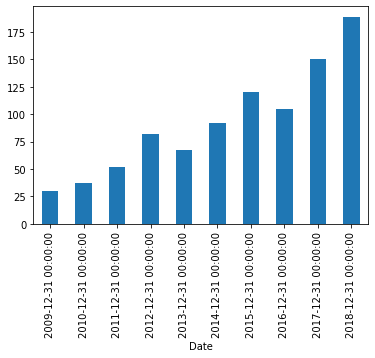

In [80]:
#매년 종가의 연 평균 
df['Close'].resample('A').mean().plot(kind='bar')

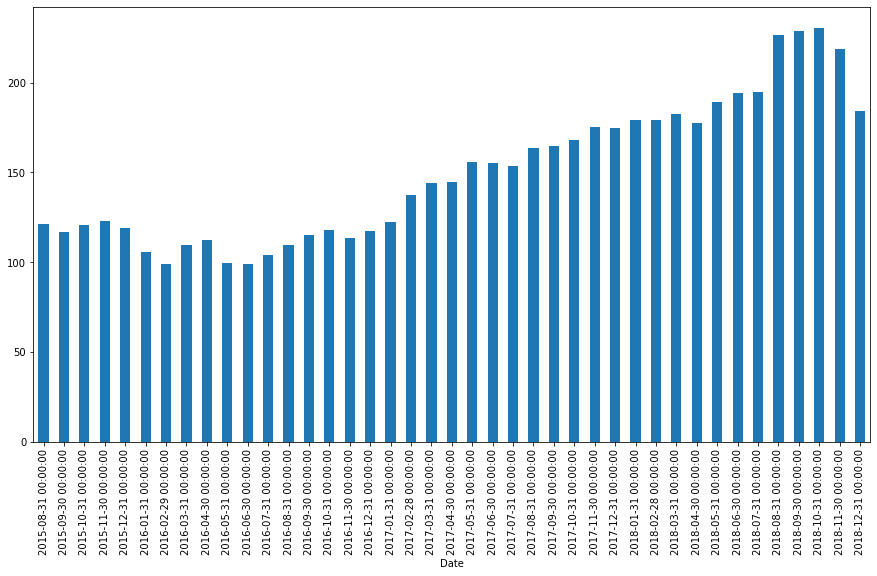

In [85]:
df['Open']['2015-8':].resample('M').max().plot(kind='bar', figsize=(15,8))

In [88]:
daily_daterange = pd.date_range(start=datetime(2018,9,1), 
             end = datetime(2019,1,24),
             freq='B')   #주말제외 business날만 

In [91]:
daily_dataset = \
    pd.DataFrame({'value' : np.random.rand(len(daily_daterange))},
                index = daily_daterange)

In [92]:
daily_dataset.head()

,value
2018-09-03,0.960072
2018-09-04,0.479376
2018-09-05,0.276126
2018-09-06,0.026363
2018-09-07,0.596894


In [93]:
#월요일 값들만 
daily_dataset.resample('W-Mon').min()

,value
2018-09-03,0.960072
2018-09-10,0.026363
2018-09-17,0.063460
2018-09-24,0.058079
2018-10-01,0.080576
2018-10-08,0.295297
2018-10-15,0.081084
2018-10-22,0.039281
2018-10-29,0.238407
2018-11-05,0.322005


In [94]:
daily_dataset.resample('M').min()  #매월 마지막날 

,value
2018-09-30,0.026363
2018-10-31,0.039281
2018-11-30,0.024745
2018-12-31,0.109483
2019-01-31,0.129105


### 2. TIme Shifting 

In [98]:
df= pd.read_csv('./data/apple_stock.csv', index_col='Date')

In [99]:
df.index
# object type 

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [100]:
df.index=pd.to_datetime(df.index)

In [101]:
df.index   #datetime 

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [102]:
df.shift(1).head()
# df.shift(-1).head()  거꾸로. 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [104]:
df.tshift(freq='M', periods=1)   #월단위로 미루기  1달씩 뒤로 미루기 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
...,...,...,...,...,...,...
2018-12-31,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-31,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-31,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994


### 3. Rolling & Expanding 

In [107]:
df = pd.read_csv('./data/apple_stock.csv', index_col='Date', 
                parse_dates=True)   
#바로 날짜형식으로 인덱스 
#혹은 parse_date=['Date'] 이런식으로 직접 지정해주어도 됨. 
# 파싱이 안되는 컬럼들이 있을수도 있으므로 그 경우에는 직접 지정. 

In [106]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [125]:
#파싱 안되는 컬럼의 예 
#19-01-01, 19-JAN-20 
#이런 경우는 파싱 함수를 만들어주어야 함 


def dateparser(str_dt) : 
#     return datetime.strptime(str_dt, '%m-%d-%Y')
    return datetime.strptime(str_dt, '%Y-%m-%d')   #string parse time : 스트링타입으로 받아 지정 
    

In [115]:
dateparser('2019-01-01')   #파싱됨 

datetime.datetime(2019, 1, 1, 0, 0)

In [122]:
dateparser('01-01-2019')

datetime.datetime(2019, 1, 1, 0, 0)

In [128]:
df = pd.read_csv('./data/apple_stock.csv', 
                index_col = 'Date',
                parse_dates=['Date'], date_parser=dateparser)

In [129]:
df.rolling(7).mean()      #7개씩 묶어서 평균값구하기 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018-12-24,163.461430,157.572856,161.605713,158.681429,5.222389e+07,158.681429
2018-12-26,161.768572,154.921428,158.648570,157.494287,5.477800e+07,157.494287
2018-12-27,160.114286,153.112858,157.275713,156.381428,5.603931e+07,156.381428


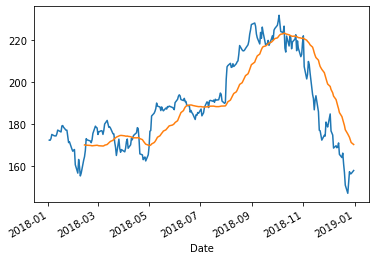

In [140]:
#원래 데이터 
df['2018']['Close'].plot()
#트렌드보기 - 종가/ 30일씩 묶어서
df['2018'].rolling(window = 30).mean()['Close'].plot()

In [143]:
df['Close : 30 Day Mean']=df['2018'].rolling(window = 30).mean()

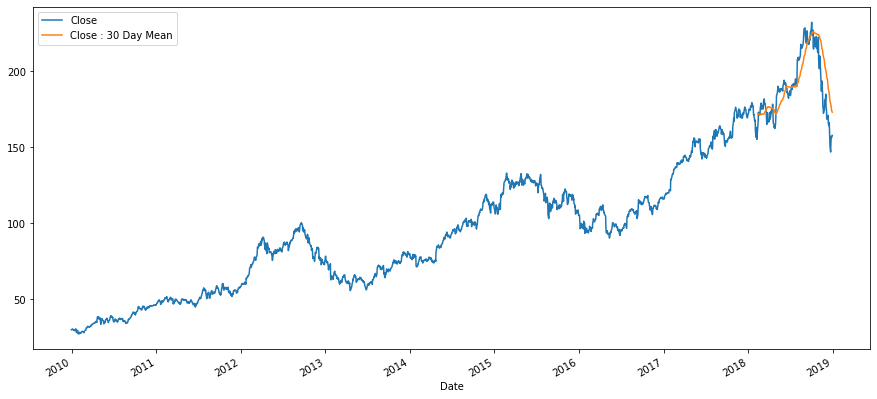

In [144]:
#이런 식으로 같이 그릴 수도 있음 
df[['Close', 'Close : 30 Day Mean']].plot(figsize=(15,7))

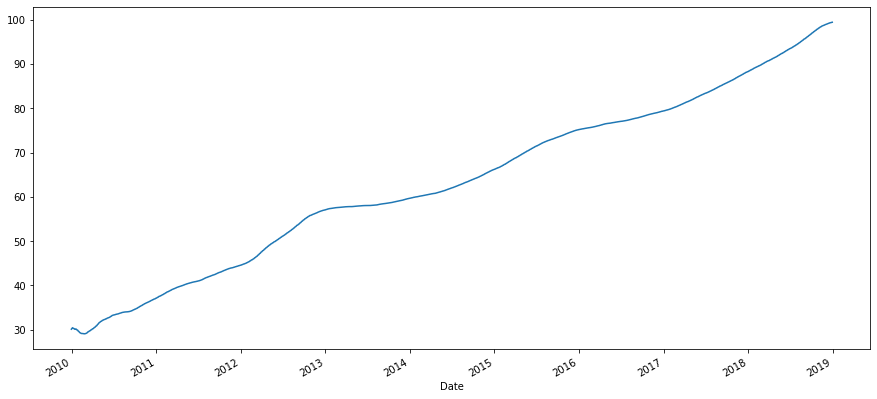

In [145]:
## expanding = 시점을 고정함 
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))  #누적 평균 

In [151]:
#종가에대한 표준편차 구해서 *2해서 더하고 *-2더하면 moving average 
df['Close : 20 day mean']=df['Close'].rolling(window=20).mean()

In [152]:
df['Upper']=df['Close : 20 day mean'] + 2*df['Close'].rolling(20).std()

In [153]:
df['Lower']=df['Close : 20 day mean'] - 2*df['Close'].rolling(20).std()

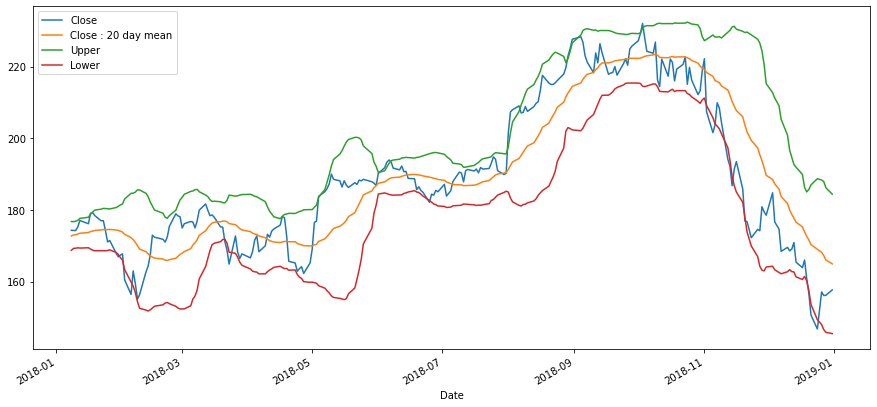

In [160]:
df[2018:][['Close', 'Close : 20 day mean', 'Upper', 'Lower']].plot(figsize=(15,7))

## 3강. TimeZone, Visualizing 

In [161]:
#국가별 시간차! 
from datetime import datetime 

In [162]:
from datetime import timezone 

In [163]:
timezone.utc   #pandas에는 utc밖에 없음  그래서 아래에서 pytz 인스톨 

datetime.timezone.utc

In [165]:
datetime(2019,1,1)  #timezone unawared datetime 이라고 함  

datetime.datetime(2019, 1, 1, 0, 0)

In [166]:
datetime(2019, 1,1, tzinfo=timezone.utc) #timezone awared datetime 

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [167]:
# conda install pytz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [168]:
import pytz

In [169]:
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [178]:
KST = pytz.timezone('Asia/Seoul')

In [177]:
datetime(2019,1,1, tzinfo=timezone.utc)== pytz.UTC.localize(datetime(2019,1,1))
#True 나옴 

True

In [179]:
KST.localize(datetime(2010,1,1))   #이런식으로 로컬라이즈 가능 

datetime.datetime(2010, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [181]:
datetime(2019,1,1, tzinfo=timezone.utc) == \
KST.localize(datetime(2019,1,1))  #False

False

In [182]:
mydate = datetime(2019,1,1)

In [183]:
mydate.replace(year=2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [184]:
mydate.replace(tzinfo=KST)
#된 것처럼 보이지만 안됨. (시간보면..)
#따라서 타임존에다 로컬라이즈해줘서 리턴받는게 정확함 

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [185]:
mydate_kst = KST.localize(mydate)

In [186]:
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [189]:
#타임존 바꿔보기  utc를 한국 시간에 맞춰서 
mydate_kst.astimezone(pytz.utc)

datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)

In [190]:
mydate_kst.astimezone(pytz.utc) == mydate_kst

True

In [191]:
#포맷팅 
mydate_kst.strftime('%Y-%m-%d %H:%M:%S%Z')

'2019-01-01 00:00:00KST'

In [192]:
mydate_kst.astimezone(pytz.utc).strftime('%Y-%m-%d %H:%M:%S%Z')

'2018-12-31 15:00:00UTC'

In [193]:
#OS 설정한 대로 읽음. OS가 미국시간으로 셋팅되어있으면 미국시간으로 읽힘 
# 따라서 이런건 좀 위험함 
datetime.today()

datetime.datetime(2021, 4, 15, 13, 15, 49, 401923)

In [194]:
#기준시를 출력하기 떄문에 이걸 더 많이씀 
datetime.utcnow()

datetime.datetime(2021, 4, 15, 4, 16, 54, 743921)

In [196]:
#어디든 어떤 컴퓨터든 똑같은 시간이 나옴 
datetime.utcnow().astimezone(KST)

datetime.datetime(2021, 4, 15, 4, 20, 55, 549086, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [197]:
today = datetime.today()

In [198]:
today.weekday()   #3=목요일. 0~6까지 있음 

3

In [199]:
#quiz : 저번주 금요일 구하는 함수 만들기 
def last_friday() :
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    aweekago= today.replace(day=today.day-7)
    last_friday = aweekago.replace(day=aweekago.day + offset)
    return last_friday 
#문제는 만약 오늘이 연초이면 aweekago값이 -값이 되어버림. 
#이를 해결하기 위해서.. timedelta 사용?! 

In [200]:
last_friday()

datetime.datetime(2021, 4, 9, 15, 6, 12, 276530, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [201]:
from datetime import timedelta 

In [203]:
pytz.utc.localize(mydate) - KST.localize(mydate)
#32400초 = 9시간 차이! 

datetime.timedelta(seconds=32400)

In [204]:
#9시간 늘어남 
pytz.utc.localize(mydate) + timedelta(seconds=32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

In [205]:
#quiz : 저번주 금요일 구하는 함수 만들기  (2) 
def last_friday() :
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    aweekago= today - timedelta(weeks=1)
    last_friday = aweekago + timedelta(days=offset)
    return last_friday 

In [206]:
last_friday()

datetime.datetime(2021, 4, 9, 15, 14, 48, 831167, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

### 2. Visualization 

In [3]:
import pandas as pd 
df = pd.read_csv('./data/apple_stock.csv', 
                index_col = 'Date',
                parse_dates=True)

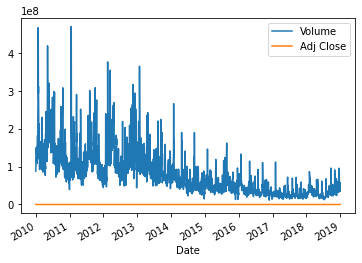

In [5]:
df[['Volume', 'Adj Close']].plot()

Text(0.5, 1.0, 'Apple')

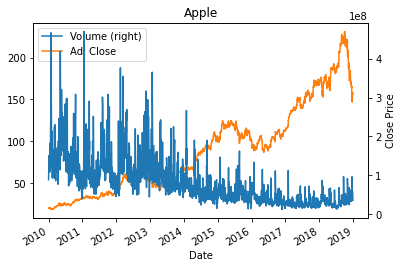

In [8]:
import matplotlib.pyplot as plt 

df[['Volume', 'Adj Close']].plot(secondary_y=['Volume'])
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date')
plt.title('Apple')

#기본적으로 그래프는 판다스로 그리고 
#나머지는 멧플롯립 으로 

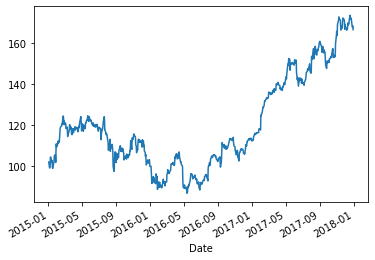

In [9]:
df['Adj Close']['2015-01-01':'2018-01-01'].plot()

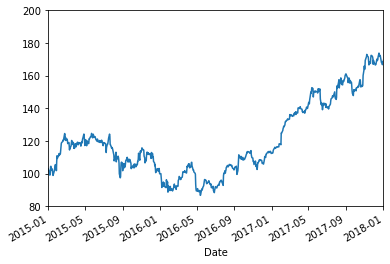

In [15]:
#요렇게 기간을 잘라서 볼 수 있다! 
df['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'], 
                    ylim = [80,200])

In [16]:
index = df['2015-01-01':'2018-01-01'].index
stock = df['2015-01-01':'2018-01-01']['Adj Close']

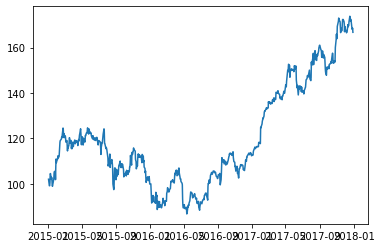

In [17]:
#matplot 
fig, ax = plt.subplots() 
ax.plot(index, stock, '-')  #날짜 겹치게 그려짐 

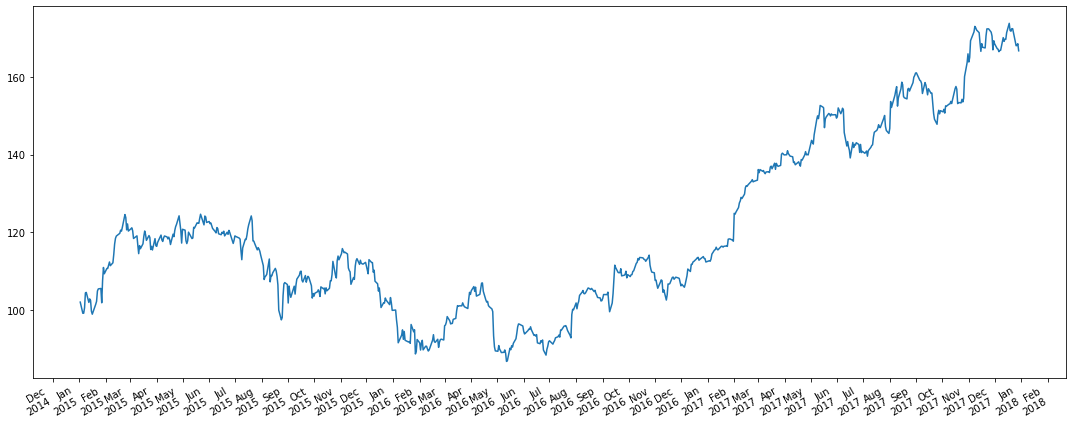

In [25]:
import matplotlib.dates as dates 

fig, ax = plt.subplots(figsize=(15,6)) 
ax.plot(index, stock, '-')
ax.xaxis.set_major_locator(dates.MonthLocator()) #x축값의 포맷 변환 
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
fig.autofmt_xdate()   #아래꺼 해결 안되면 이거 쓰기 
plt.tight_layout()     #x축 라벨 겹치게 표현되는거 알아서 풀어서 표현해줌 

## 4강. 시계열 데이터 특성 및 ETS 모델 이해 

### 1. 시계열 데이터 특성  
> ### Trends  
> 상향, 하향, horizontal/stationary  
> ### Seasonality  
> 반복되는 트렌드  
> ### Cyclical 
> 일정치 않은 기간의 트렌드 

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#y_t = Trend + Seasonality + Error 

In [5]:
# conda install statsmodels

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.0-py38hecd8cb5_0 --> 4.10.1-py38hecd8cb5_1



conda-4.10.1         | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [10]:
# 가상 데이터 만들기 
#상향 트렌드 (1->99) 
#randint = 노이즈 섞어주기 
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])  

In [15]:
#decompose에 시리즈 넘겨주고 
# 디폴트모델은 additive 
# 시리즈로 넘겨주어서 freq 써줌 
result = seasonal_decompose(series, model = 'additive', period=1)

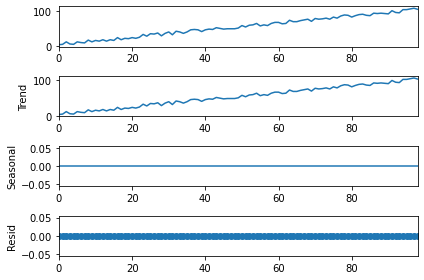

In [26]:
#;안붙여주면 2개가 나옴.. 원래 1개만 나와야하는데 왜인지모를? 
result.plot(); 

In [24]:
def plot_decompose(decomposerresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
    decomposerresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decomposerresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposerresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposerresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')
    

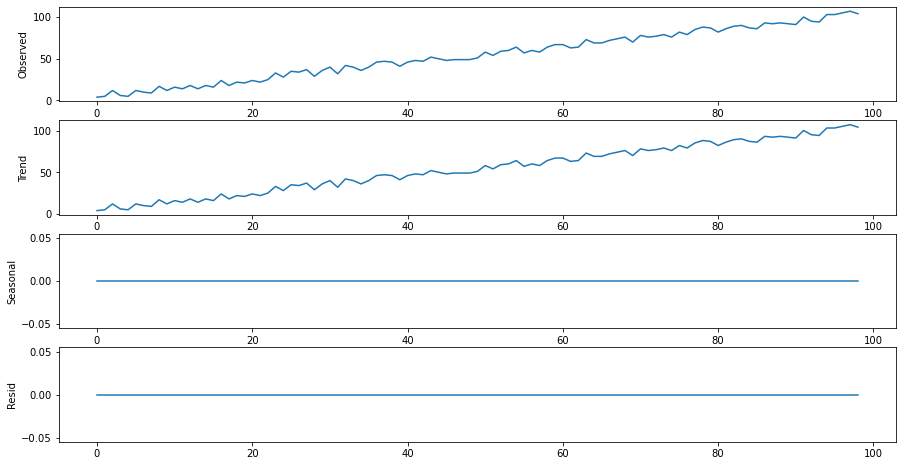

In [25]:
plot_decompose(result)

In [27]:
#멀티플리컷팅모델 (곱하기)
#사실 로그씌우면 더하기랑 똑같음.
#y_t = Level * Error * Trend * Seasonality 

In [28]:
#가상의 데이터 생성 
series = pd.Series([i**2 for i in range(1,100)])

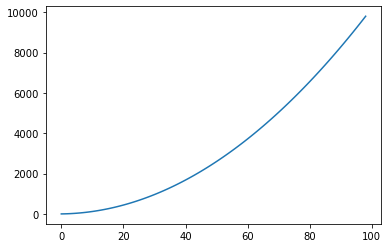

In [29]:
series.plot()

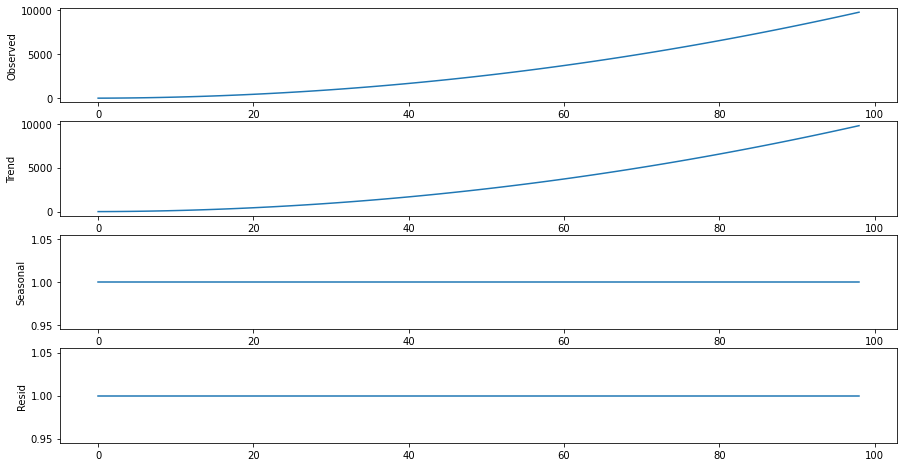

In [30]:
result = seasonal_decompose(series, model='multiplicative', period=1)
plot_decompose(result)

In [37]:
#조금 더 복잡한 데이터로
airline=pd.read_csv('data/airline_passengers.csv', index_col='Month')

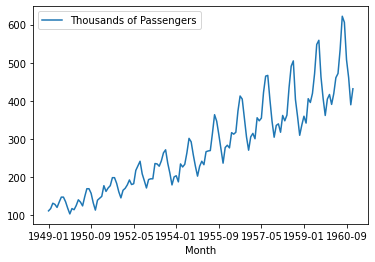

In [39]:
airline.plot()
#직선인듯 곡선인듯.. 그래서 멀티플리커티브 모델로 해도 됨 

In [41]:
airline.index=pd.to_datetime(airline.index)

In [42]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [43]:
result=\
seasonal_decompose(airline['Thousands of Passengers'],
                  model= 'multiplicative')

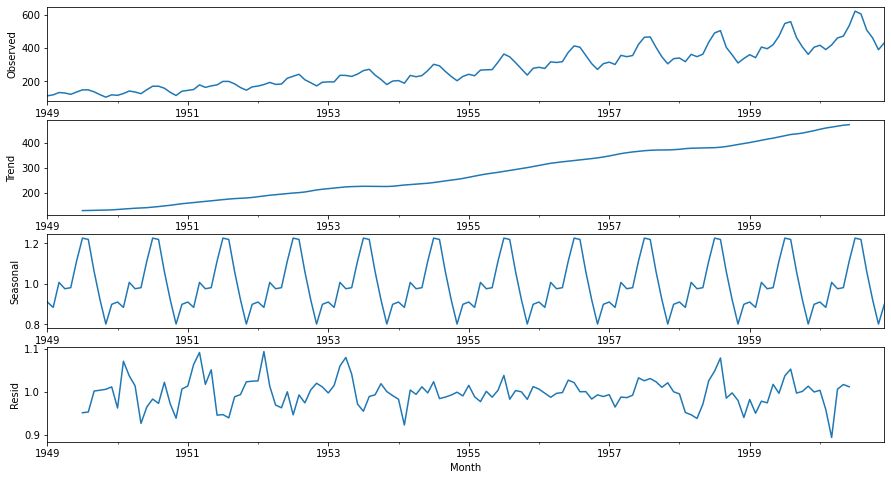

In [44]:
plot_decompose(result)
#시계열 데이터를 분석한다는 건 
# 트렌드와 seasonality를 제거하고 노이즈에서 패턴을 얻어다 모델링 
# 예측은 모델링은 다시 트렌드와 seasonality를 더해주는 방식으로 함 

## 5강. 시계열 데이터 분석 기본 모델  
> ### SMA (simple moving average)
> 전일대비 변동률 등과 같은것. 
> ### WMA (weighted moving average)
> 가중치 줘서 계산 
> ### SES (simple exponential smoothing) 
> F담날예측값 = F지금예측값 + a(A지금값 - F지금예측값)  
> a=가중치, A지금 = 지금가격, F지금 = 예측된 지금가격 (A지금-F지금) = residuals  
> 0 <= a <= 1
  
  
  
위 두개는 moving average인데 그때문에 예측 residuals가 꽤 큼.  
ses도 마찬가지로 trend, seasonality 를 반영하지 못함 - hort winters 


In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [29]:
airline=pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [30]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 1. Simple Moving Average

In [31]:
#rolling 으로 구하는 거랑 동일 

airline['6M SMA'] = airline['Thousands of Passengers'].rolling(6).mean()
airline['12M SMA'] = airline['Thousands of Passengers'].rolling(12).mean()

In [33]:
airline.head(10)

,Thousands of Passengers,6M SMA,12M SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


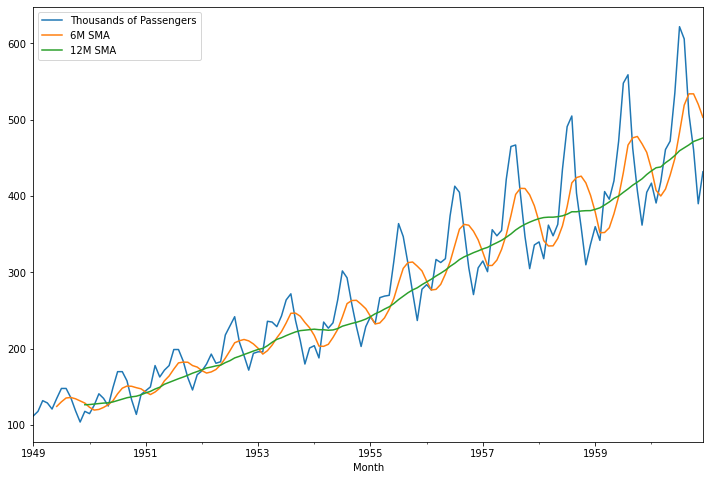

In [34]:
airline.plot(figsize=(12,8))

In [37]:
from sklearn.metrics import mean_squared_error

In [40]:
#residual 구하기 
mean_squared_error(airline['Thousands of Passengers'], airline['6M SMA']) 
#요렇게 구하면 되는데 y_pred이 없어서.. 일단 패스 

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

### 2. Weighted Moving Average 

In [41]:
airline['WMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean() #12개(달)의 텀에다 ~~ 
airline['WMA6']= airline['Thousands of Passengers'].ewm(span=6).mean()  #과거 6개(달)의 텀에다 웨이트 자동으로 줘서 계산한 prediction 값 

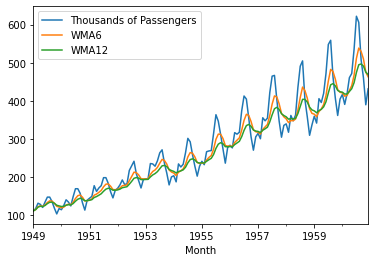

In [43]:
airline[['Thousands of Passengers', 'WMA6', 'WMA12']].plot()
#WMA 는 위의 SMA와 다르게 트렌드 모습이라기보다는 원래 데이터와 마찬가지로 고저를 잘 예측한 것을 볼 수 있음 

### 3. Simple Exponential Smoothing, Holt's, Holt-Winter's  
> SES : trend(X), seasonality(X)  
> Holt's : trend(O), seasonlity(X)  
> Holt-Winter's : trend(O), seasonality(O)

### 3.1 SES

In [44]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [45]:
#이건 계산 후 fitting 후 modeling해야해서 데이터를 나누어서 
train = airline[:'1959']
test = airline['1960':]

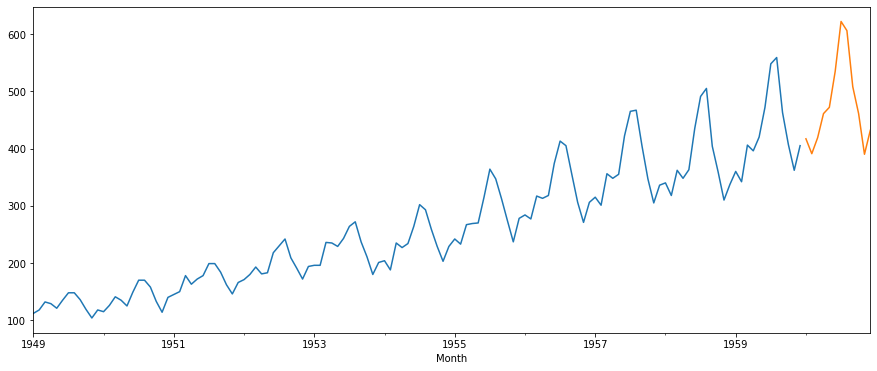

In [46]:
train['Thousands of Passengers'].plot(figsize=(15,6))
test['Thousands of Passengers'].plot()  #오렌지 부분이 test데이터 부분인데, 우리의 예측이 저렇게 되어야함. 따라서 예측하고 요 그래프에 씌워볼 예정 

In [47]:
ses_model = \
SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [48]:
ses_result= ses_model.fit()  #train data fitting! 

In [50]:
y_hat=test.copy()  #test 오염 방지로 카피본 

In [51]:
y_hat['SES'] = ses_result.forecast(len(test))   #()안에는 몇 개를 예측할 것인지 

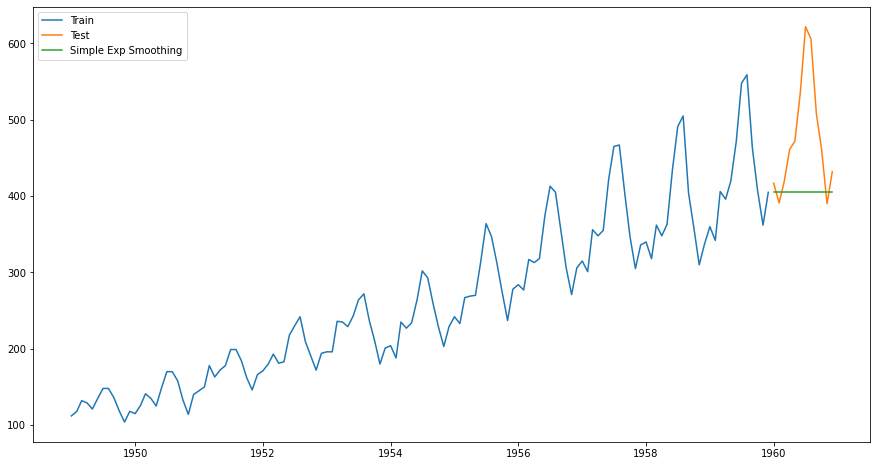

In [52]:
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label = 'Test')
plt.plot(y_hat['SES'], label = 'Simple Exp Smoothing')
plt.legend()
#trend, seasonlity 모두 반영안된 결과. 그냥 요정도 레벨일 것이다 .. 

In [57]:
import numpy as np 

#residual 구하기 
# mean_squared_error(실제값, 예측값)
rmse =np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))

In [58]:
rmse

102.97653454387881

### 3.2 Holt's 

In [59]:
from statsmodels.tsa.api import Holt 

In [61]:
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [62]:
holt_result = holt_model.fit()

In [64]:
y_hat['HolT'] = holt_result.forecast(len(test))

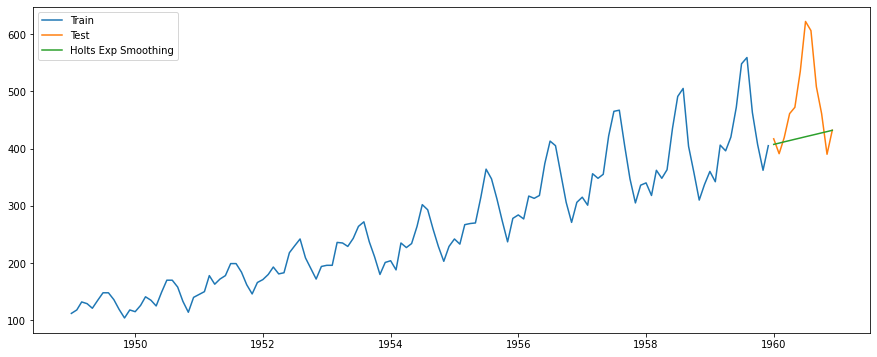

In [65]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label ='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HolT'], label='Holts Exp Smoothing')
plt.legend()

#trend 반영함. 약간 상향 사선으로 그려짐 ! 

In [67]:
rmse =np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HolT']))

In [68]:
rmse   #줄어들었다! 

92.66636437115082

### 3.3 Holts-Winters

In [69]:
from statsmodels.tsa.api import ExponentialSmoothing

In [72]:
winter_model = ExponentialSmoothing(
np.asarray(train['Thousands of Passengers']), 
seasonal_periods=12, trend='add', seasonal='add'
)  #연단위 주기

In [74]:
winter_result = winter_model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [75]:
y_hat['WINTER'] = winter_result.forecast(len(test))

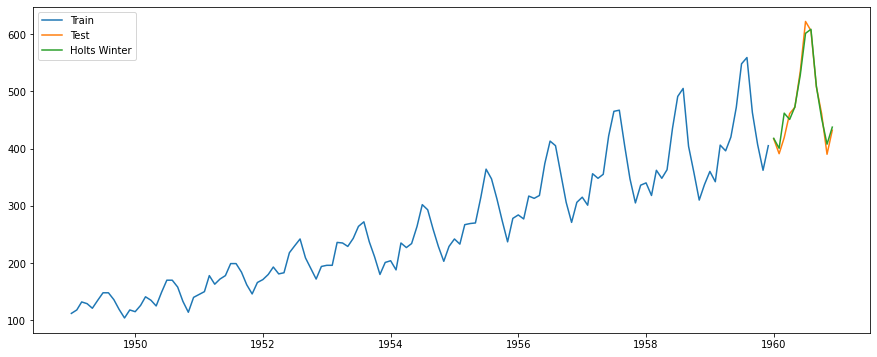

In [77]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label ='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holts Winter')
plt.legend()

#거의 비슷하다! 

In [78]:
rmse =np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['WINTER']))

In [79]:
rmse  #엄청 좋아졌다! 

15.570830252583184

### 3.4 ARIMA (Autoregressive Integrated Moving Average)
trend와 seasonliaty 가 확실하면 holts-winter쓸 수 있는데 그렇지 않은 경우도 있다. 그럴 땐 ARIMA 를 쓴다!  
ARIMA모델은 위의 모델들과 달리 데이터 특성을 탄다!  
**1) Stationary vs. Non-Stationary time series**  
**2) Seasonal vs. Non-seasonal** 
> Nonseasonal ARIMA(trend만 있을 때) : ARIMA(p,d,q)  
> Seasonal ARIMA(seasonality까지 있을때) : ARIMA(p,d,q)(P,D,Q)m 
  
    
**[1] Stationary data**  
- 연속되는 숫자들의 평균이 time invariant 
- 연속되는 숫자들의 평균이 time invariant  
- 연속되는 숫자들의 공분산이 time invariant  
  
**[2] Stationary Test** 
- ARIMA 모델은 시계열 데이터가 stationary 특성을 보일 때 효과적. 따라서 이를 확인해야함  -> Augmented Dickey-Fuller test 
  
**[3] Differencing**  
- 시계열 데이터가 Non-Stationary 하다면 초기 differencing 작업을 한 번 이상 적용해서 데이터를 stationary 하게 만드는 단계가 필요함 
    


In [81]:
import statsmodels.api as sm 

In [82]:
arima = sm.tsa.statespace.SARIMAX(
train['Thousands of Passengers'], 
    order = (2,1,1),  #p,d,q
    seasonal_order=(0,1,0,12),  #12=12달
    enforce_stationarity=False,  #에러나는거 강제로 끔 
    enforce_invertibility=False
)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [83]:
arima_result=arima.fit()

In [84]:
# arima_result.forecast()   #()안에 예측할 데이터의 갯수를 받는다.

#()안에 예측할 데이터의 인덱스를 받는다. 
y_hat['ARIMA'] = \
arima_result.predict(start='1960-01-01', 
                    end = '1960-12-01', dynamic=True   #여러개의 데이터를 예측하기위해 dynamic=True 
                    )    

#arima 모델의 한계는 한스텝밖에 예측을 못한다는 점.
#이를테면 지금 위에서 60/1/1예측한 값을 가지고 다음달 예측하고, 그 다음달 예측하고.. 이렇게 함. 


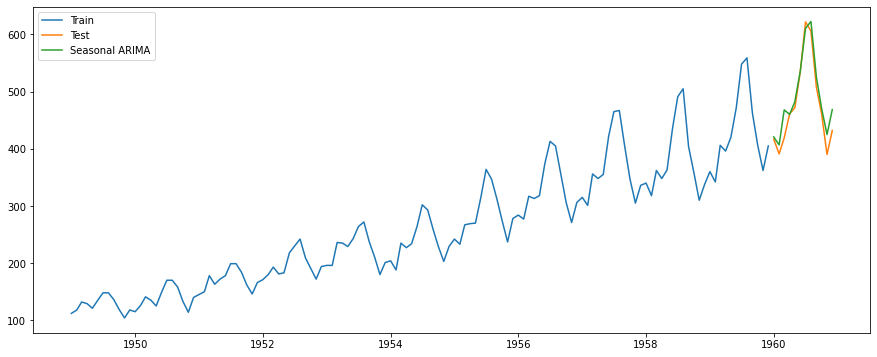

In [85]:
plt.figure(figsize=(15,6))
plt.plot(train['Thousands of Passengers'], label ='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

#exponential smoothing이랑 거의 비슷하다! 

In [86]:
rmse =np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['ARIMA']))

In [87]:
rmse  #exponential smoothing보다 안좋당 ㅎㅎ 근데 도찐개찐..

22.652174051029185